### Parallel programming


 - Concurrent programming = regural programming is concurrent that is it works through a script in order, executing one step after another (single thread execution, task 1, task 2, ... task N)
 - Multi-threading = if some tasks in a script are independent to each other (that is we do not need to complete task 1 to complete task 5) we can split the tasks between two or more threads (a thread handles task 1, task 2, .., another thread task 6, task 7, ... )
 - Modern computers have multiple cores in their CPU so we can run these threads in parallel on different cores
 - If this happens inside a single python process (a process is an instance of a program) it is called multi-threading
 - An alternative to multi-threading is parallel processing where each of these threads are run on different instance of Pyhton (process) - this is like having Python open twice or more 
 - In parallel processing, processes have their own RAM space
 - In multi-threading, threads share (use the same) RAM space
 - Parallel programming is writing code so that it can run in parallel using threads or processes
    

<img src="assets/parallel_prog/par_prog.png" style="width: 600px;"/>


 - we can use Dask to write code to utilise a machine's multiple cores
 - Dask utilises lazy evaluation
 - lazy evaluation means computations are not run until the moment the result is needed
 - instead a list of tasks is created so all the steps required to compute the result are stored for later
 - Dask analyses and splits the tasks between threads and processes

In [1]:
import dask
from dask import delayed
import numpy as np
import pandas as pd

In [2]:

def fraction_to_percent(x):
    percentage = x * 100
    print('Converting to percentage')
    return x

frac = 0.3
percentage = delayed(fraction_to_percent)(frac)


In [3]:
computed_percentage = percentage.compute()

print(percentage)
print(computed_percentage)

Converting to percentage
Delayed('fraction_to_percent-f9b010c8-6ddf-4fcc-ad1d-bb43cea116db')
0.3


In [4]:
# Import the delayed function from Dask
from dask import delayed

# Lazily calculate the sums of costs_week_1 and costs_week_2
sum1 = delayed(np.sum)(2300)
sum2 = delayed(np.sum)(4342)

# Add the two delayed sums
total = sum1 + sum2

# Compute and print the final answer
print(total.compute())

6642


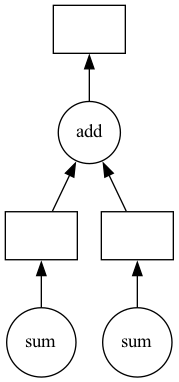

In [5]:
total.visualize()

### Differences between threads and processes

- Dask allows you to use either parallel processing or multi-threading
- Each of these has its benefits and drawbacks, and which performs best will depend on your task

 <img src="assets/parallel_prog/threads_vs_processes.png" style="width: 600px;"/>

Python has a global interpreter lock that allows only for a single thread to read the script at a time 
 <img src="assets/parallel_prog/gil.png" style="width: 600px;"/>
 <img src="assets/parallel_prog/loading_data.png" style="width: 600px;"/>
 <img src="assets/parallel_prog/data_in_chunks.png" style="width: 600px;"/>


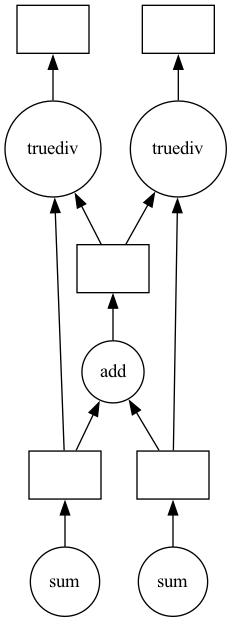

In [7]:
month_1_costs = delayed(sum)(1212092)
month_2_costs = delayed(sum)(2123233)
# Add the two delayed month costs
total_costs = month_1_costs + month_2_costs

# Calculate the fraction of total cost from month 1
month_1_fraction = month_1_costs / total_costs

# Calculate the fraction of total cost from month 2
month_2_fraction = month_2_costs / total_costs

# Plot the joint task graph used to calculate the fractions
dask.visualize(month_1_fraction, month_2_fraction)

In [8]:
# top_songs = []

# for file in filenames:
#     df = delayed(pd.read_csv)(file)
#     # Find the top 10 most popular songs in this file
#     df_top_10 = top_10_most_popular(df)
#     top_songs.append(df_top_10)

# # Compute the list of top 10s
# top_songs_list = dask.compute(top_songs)[0]

# # Concatenate them and find the best of the best
# top_songs_df = pd.concat(top_songs_list)
# df_all_time_top_10 = top_10_most_popular(top_songs_df)
# print(df_all_time_top_10)

### Dask arrays
  
  <img src="assets/parallel_prog/arrays.png" style="width: 600px;"/>


### Dask dataframes

In [9]:
# # Import dask dataframe as dd
# import dask.dataframe as dd

# # Load in the DataFrame
# df  = dd.read_csv("data/spotify/*.csv", blocksize="1MB")

# # Convert the release_date column from string to datetime
# df['release_date'] = dd.to_datetime(df['release_date'])

# # Show 5 rows of the DataFrame
# print(df.head())

# # Read the spotify_parquet folder
# df = dd.read_parquet("data/spotify_parquet")

# # Find the 10 most popular songs
# top_10_songs = df.nlargest(n=10, columns='popularity')

# # Convert the delayed result to a pandas DataFrame
# top_10_songs_df = top_10_songs.compute()

# print(top_10_songs_df)

### Loading arrays from HDF5 datasets

In [ ]:
# Open the HDF5 dataset using h5py
hdf5_file = h5py.File('data/era_eu.hdf5')

# Load the file into a Dask array with a reasonable chunk size
precip = da.from_array(hdf5_file['/precip'], chunks=(12, 15, 15))

# Select only the months of January
january_rainfalls = precip[0::12]

# Calculate the mean rainfall in January for each location
january_mean_rainfall = january_rainfalls.mean(axis=0)

plt.imshow(january_mean_rainfall.compute())
plt.show()